In [ ]:
%pip install yfinance 


     |████████████████████████████████| 5.5MB 13.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=ace63ef530387ebad1b5f6c7ddc03114ff3093489be74c8f7cd35cc9035cdc00
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 as cv 

In [ ]:
import requests
import yfinance as yf
import datetime
import pandas_datareader.data as web


In [ ]:
import time
import requests
import io

In [ ]:
def market_grabber(year_range,regions,mode = "combine",clean_thresh = 0.6 , fill_na = 'bfill'):
    
    ##defining all possible markets can be edited
    tickers_dic = {
    "us_canada":['^GSPC', '^DJI', '^IXIC', '^RUT','^GSPTSE'],
    "latin": ['^BVSP', '^MXX',],
    "east_asia" : ['^N225', '^HSI', '000001.SS', '399001.SZ', '^TWII', '^KS11'],
    "ASEAN_Oceania" : ['^AXJO',  '^NZ50'],
    "south_west_aisa" : ['^BSESN', '^TA125.TA'],
    "Europe" : ['^GDAXI', '^STOXX50E','^N100', '^BFX', '^FCHI','^AEX', "^IBEX", "^OMX", "^OMXH25"],
    
    }
    #############################################
    from datetime import datetime

    now = str(datetime.today().strftime('%Y-%m-%d'))
    current_year = int(datetime.today().strftime('%Y'))
    
    area_list = regions
    year_list = [(str(year)+"-01-01",str(year)+"-12-31") for year in year_range]
    
    #year_list = [(str(year)+"-01-01",str(year)+"-12-31" if year_range[-1] != current_year else now) for year in year_range]

    
    area_output ={} #will be filled with the region that you mentioned on region_list
    

    
    for area in area_list: #Loop over the regions only those that exist in region_list
        here = str(year_range[0])+"-01-01"
        there = (str(year_range[-1])+"-12-31"  if year_range[-1] != current_year else now)
        grabbed_data = web.get_data_yahoo(tickers_dic[area],
        start = here,
        end =   there)
        

    
        temp_adj_yearly = []
        for period in year_list:
            

            dates = pd.date_range(start = period[0], end = period[1])
            df_year = pd.DataFrame(grabbed_data,index=dates)
            
            adj_close = df_year["Adj Close"]
            
            if mode == "dict":
                adj_close = adj_close[adj_close.notnull().mean(axis=1)>=clean_thresh]
                adj_close = adj_close.fillna(method=fill_na,axis = 0)

            

            
            temp_adj_yearly.append(adj_close)
    
        area_output[area]=temp_adj_yearly # adding a key for the correspond region
    
    
    
    
    if mode == "dict":
        return area_output
    ########################################## End of grabbing zone
    
    
    if mode =="combine":
        #COMBINING ZONE : 
        data = area_output

        region_list = []
        for region in regions:

            years_list = []
            for index,year in enumerate(year_range):
                years_list.append(data[region][index])


            years_together = pd.concat(years_list,axis=0)
            region_list.append(years_together)


        combined = pd.concat(region_list,axis=1)  
        
        
        return combined[combined.notnull().mean(axis=1)>=clean_thresh].fillna(method=fill_na,axis = 0)
    
    return -1 #wrong mode or unknown error

In [ ]:
all_regions_concated = market_grabber(year_range=[2016,2017,2018,2019,2020],regions=["Europe","us_canada", "latin", "east_asia","ASEAN_Oceania","south_west_aisa" ])

In [ ]:
def smooth_with_fuzzy(input_dataframe): #dataframe
    
    smooth_data_frame = input_dataframe.copy()
    
    import cv2 as cv # importing dependency
    kernel = cv.ft.createKernel(cv.ft.LINEAR, 3, 1)

    smooth_with_fuzzy = [] 
    
    for col in smooth_data_frame:
        data_in_col = smooth_data_frame[col] # data read from each column
        series_index = data_in_col.index #will use later 
        
        to_numpy = data_in_col.values
        one_d_numpy = to_numpy.flatten() #to make sure it is one-dimentional

        
        data_TC = cv.ft.FT02D_process(one_d_numpy, kernel).flatten() #fuzzy smoothing
        data_TC[-1] = one_d_numpy[-1]


        # print("input ",one_d_numpy)
        # break
        # print("index ",len(series_index))
        # print("TC ",len(data_TC))

        to_series = pd.Series(data_TC,index=series_index) # to be converted to panda series with similar index
        smooth_data_frame[col] = to_series #replace smooth series
        
    return smooth_data_frame
        
        

        
        

        
        
        

In [ ]:
all_regions_TC = smooth_with_fuzzy(all_regions_concated)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

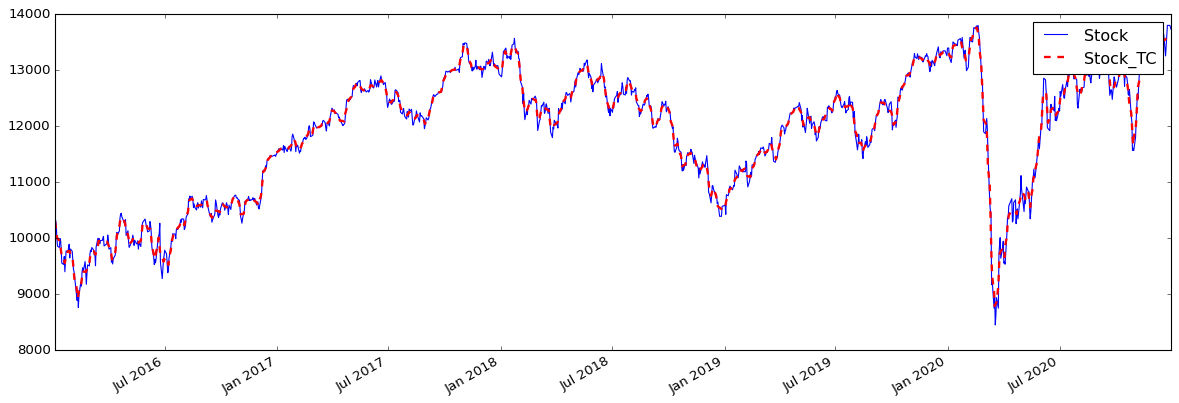

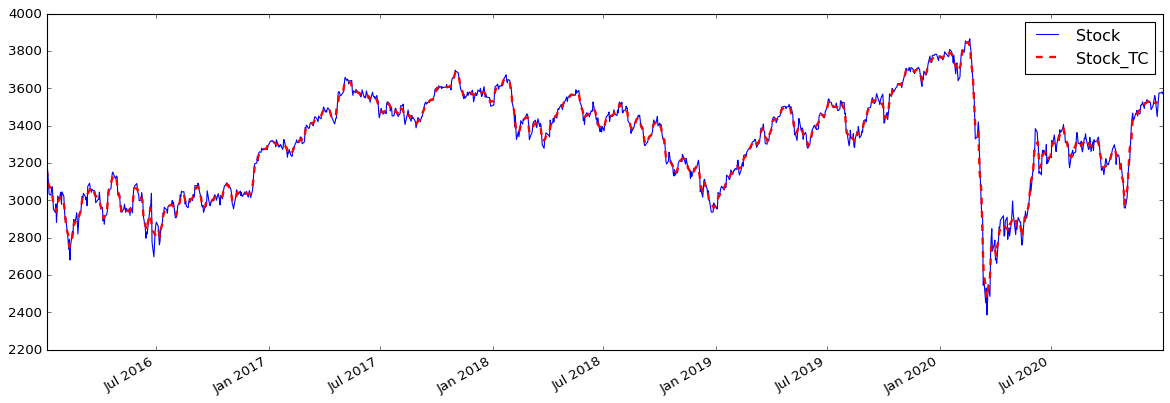

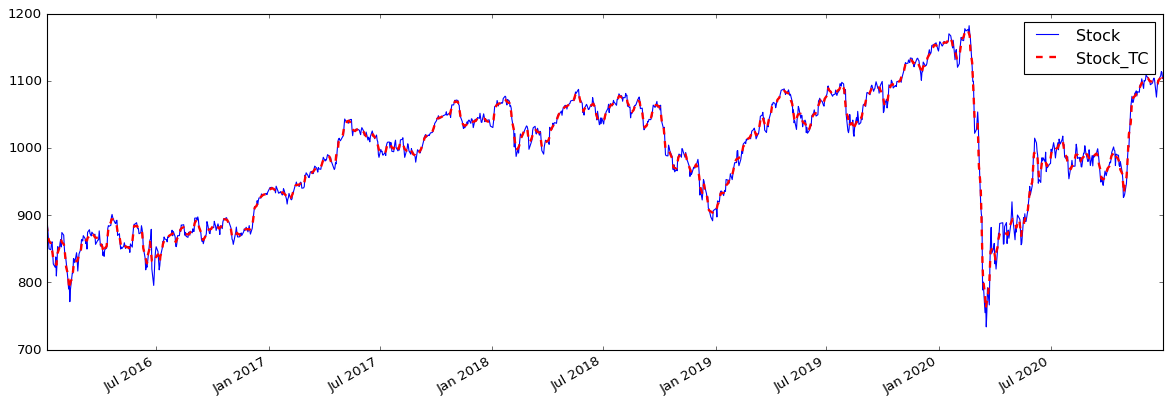

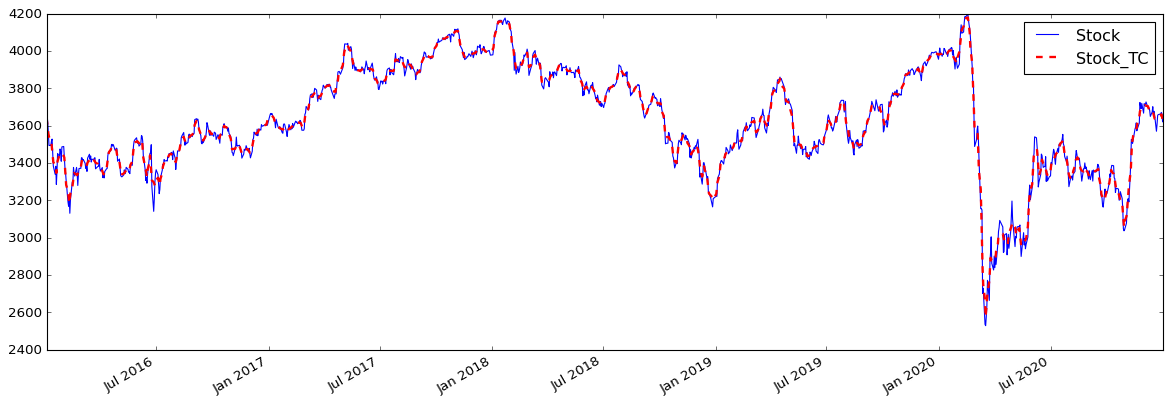

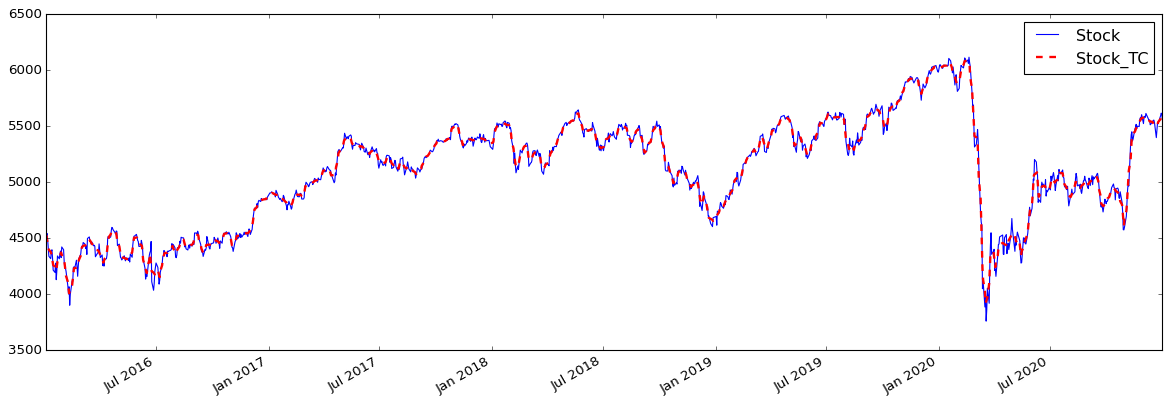

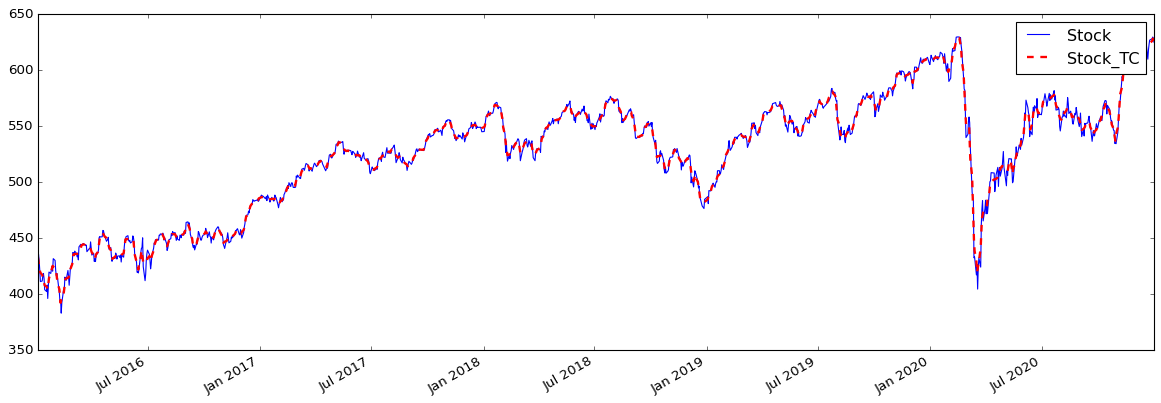

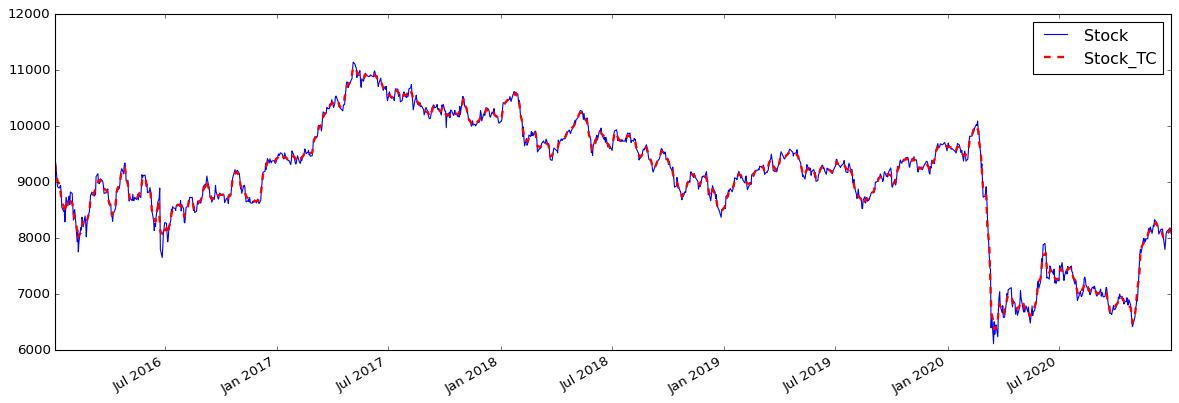

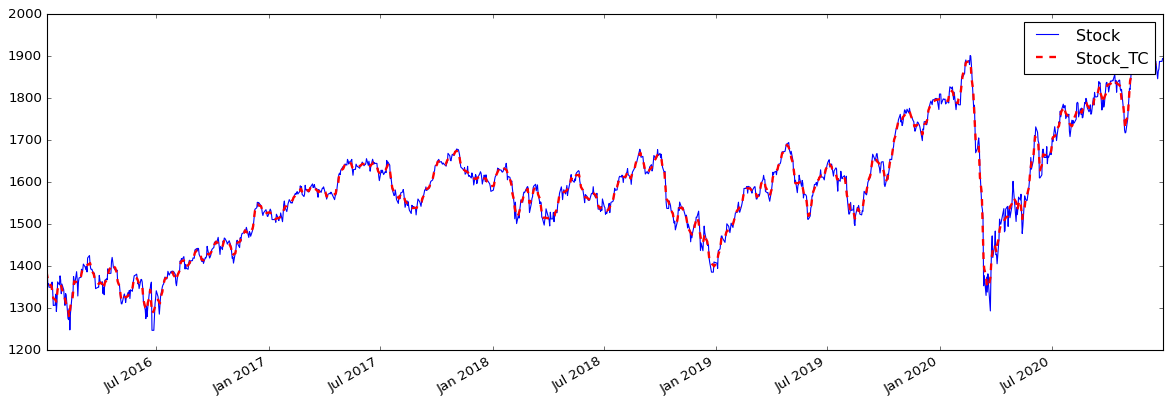

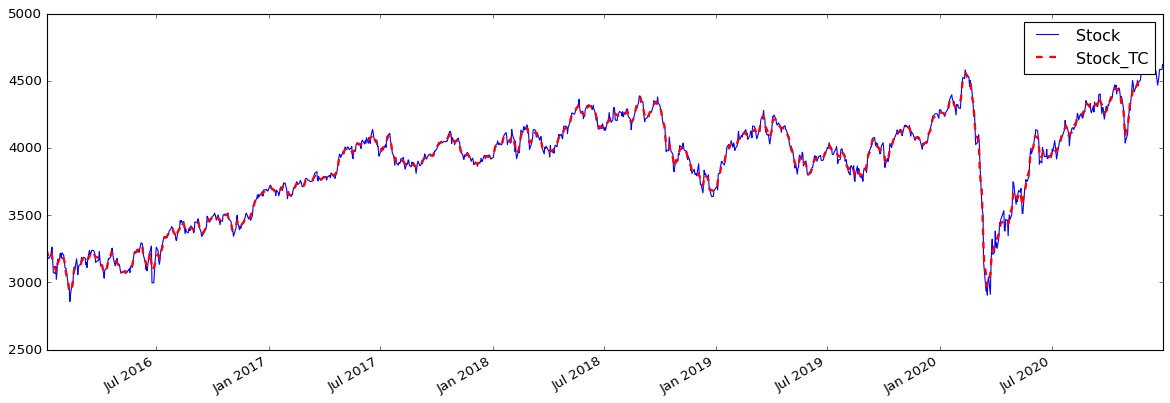

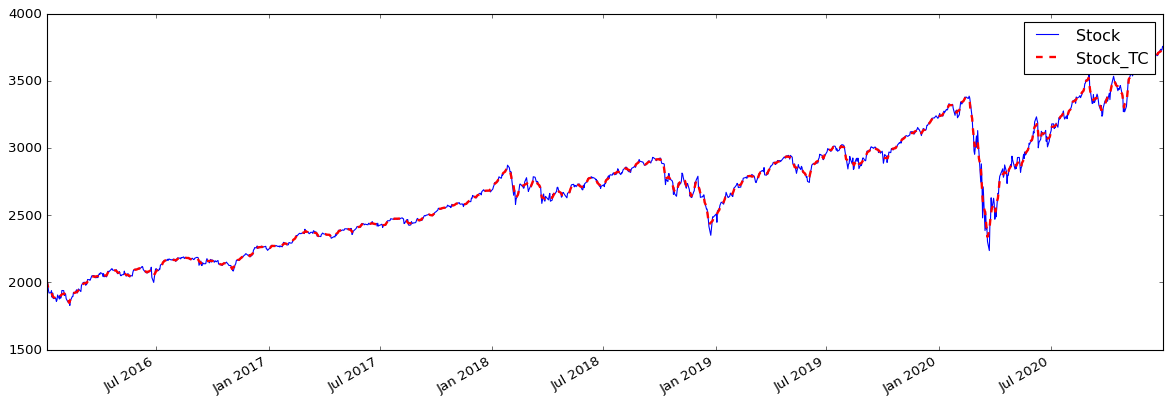

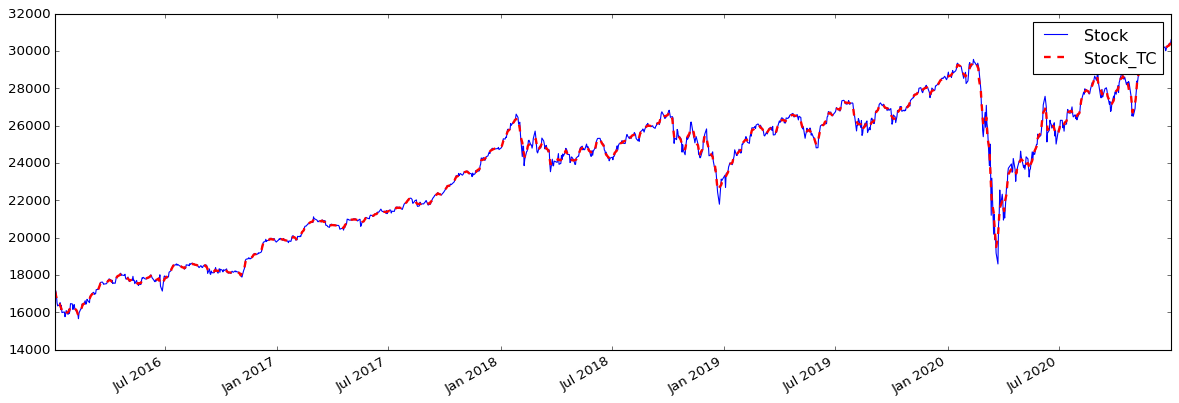

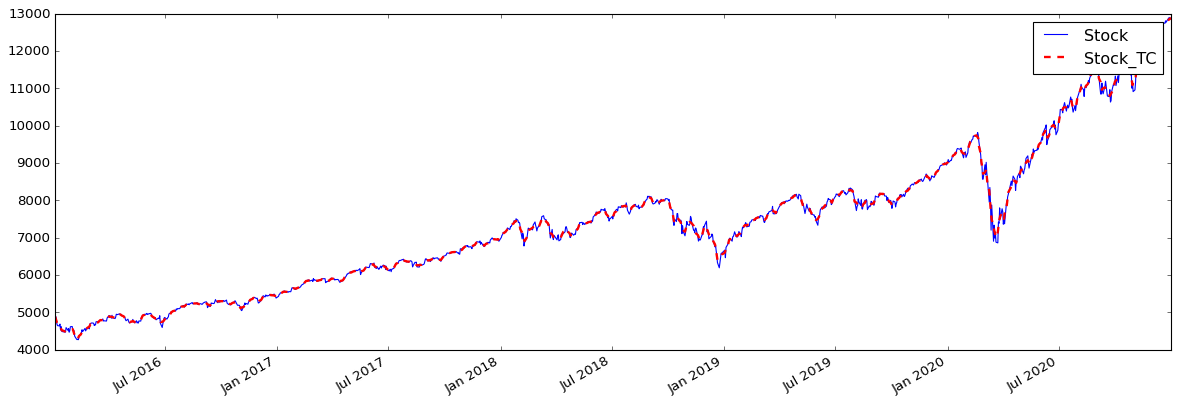

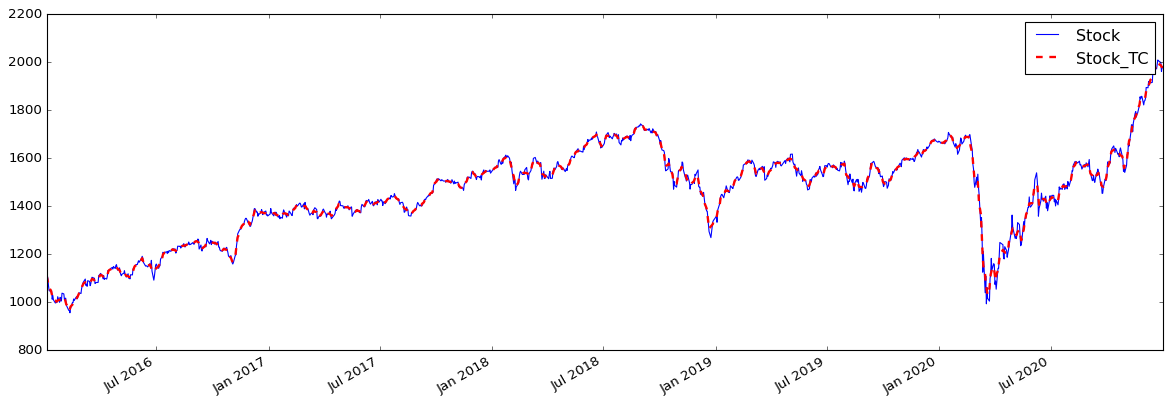

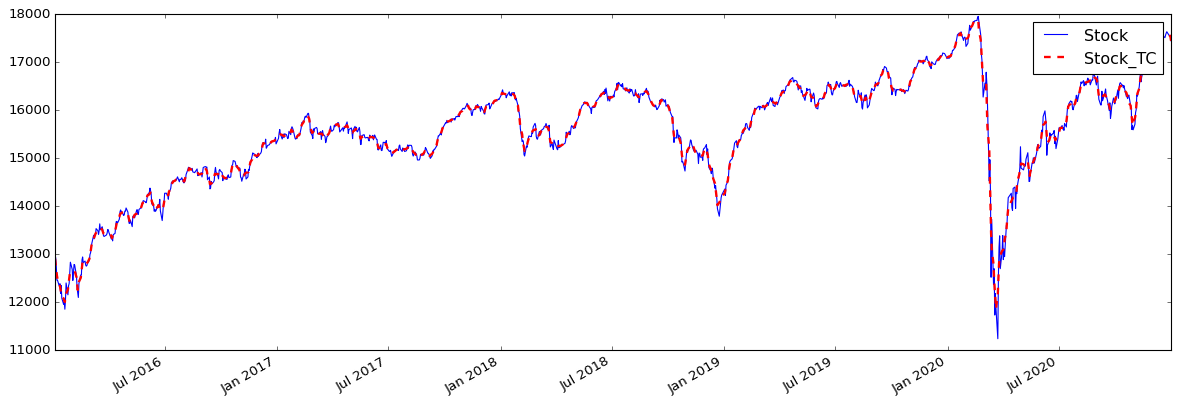

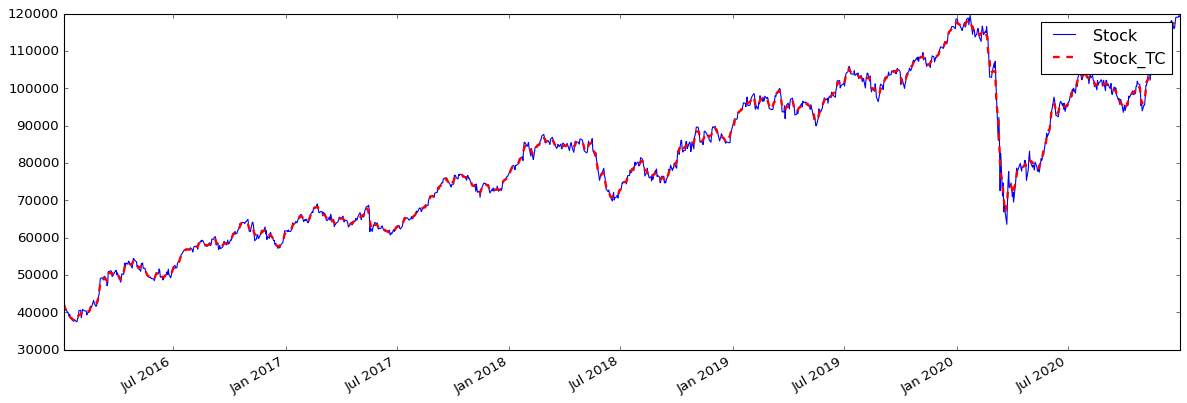

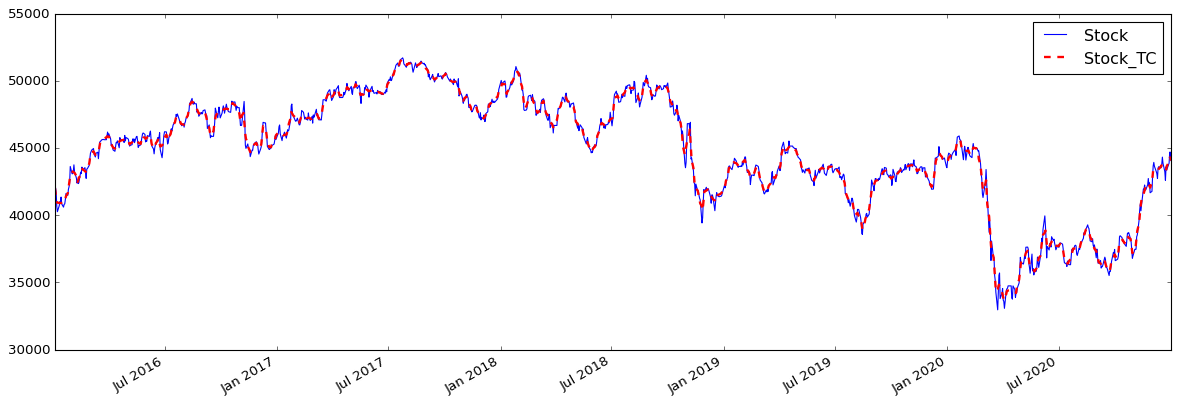

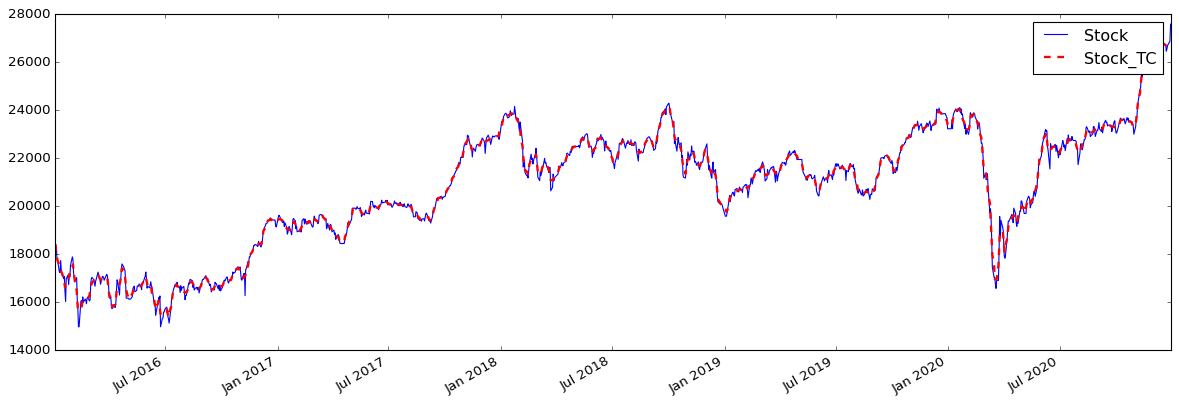

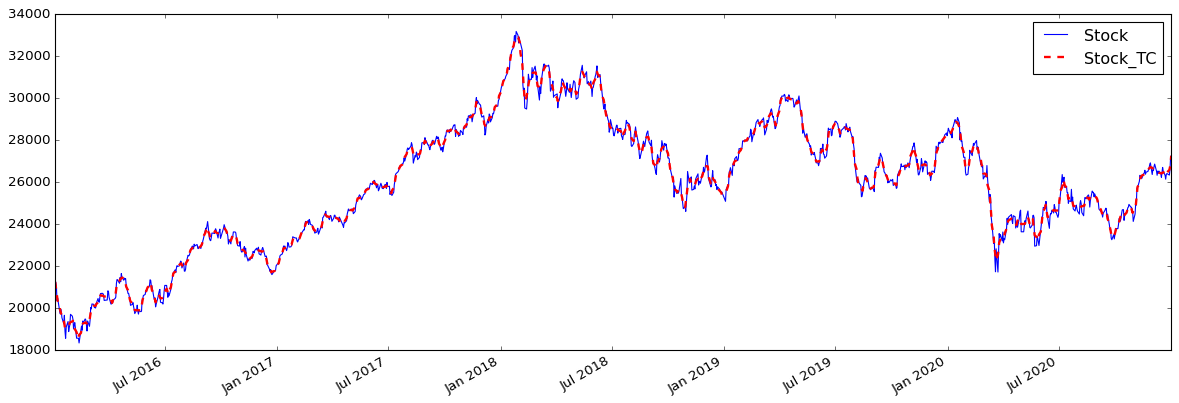

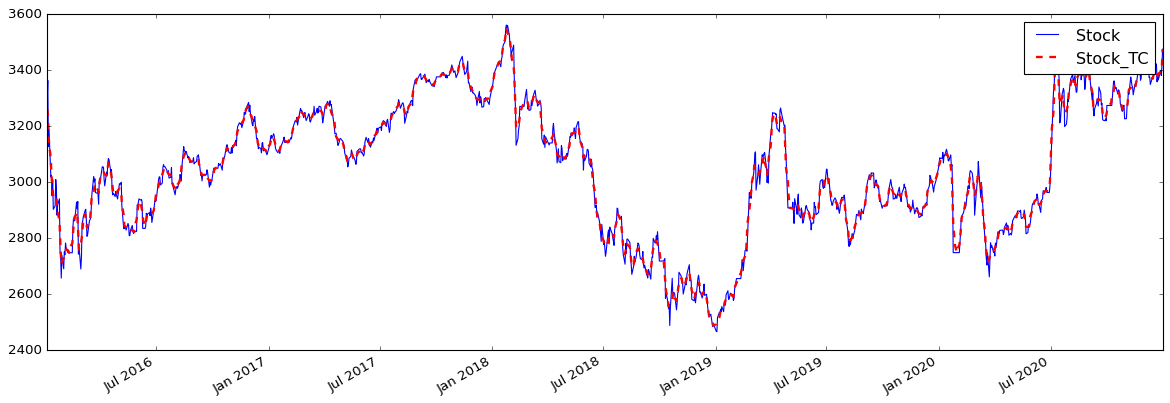

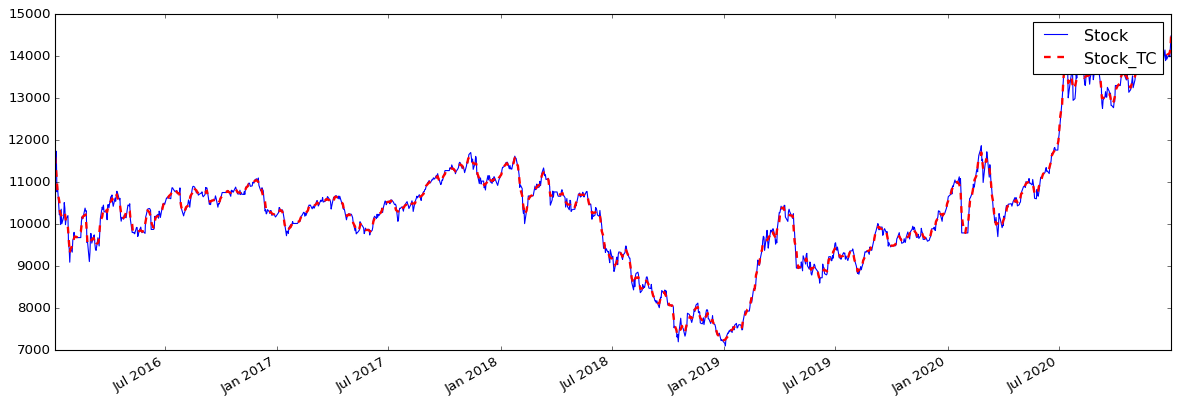

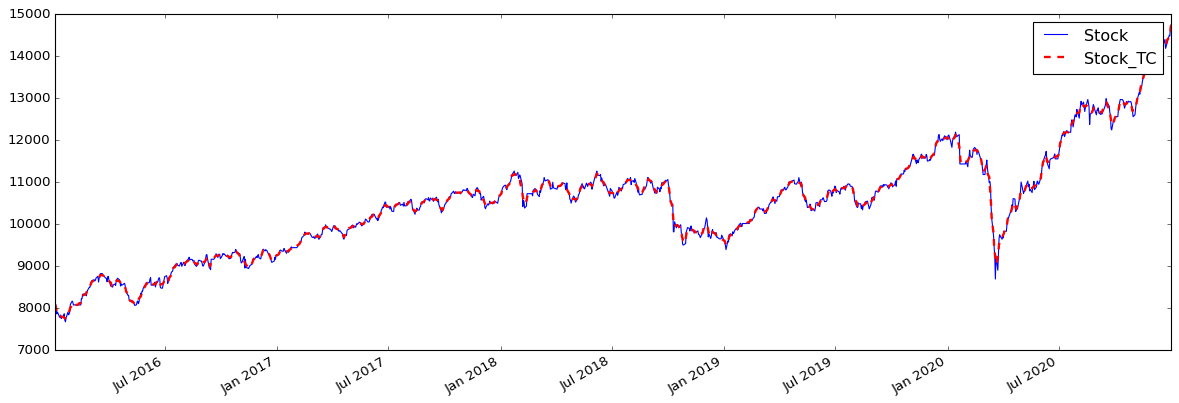

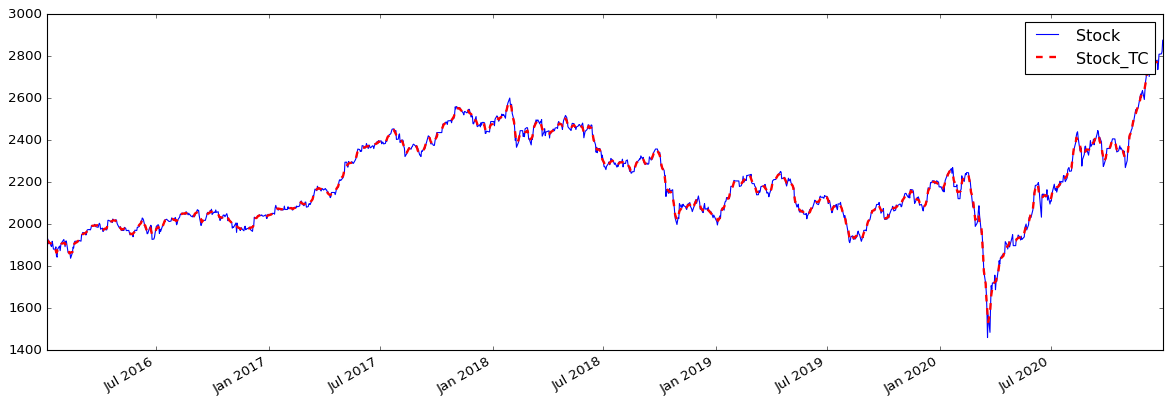

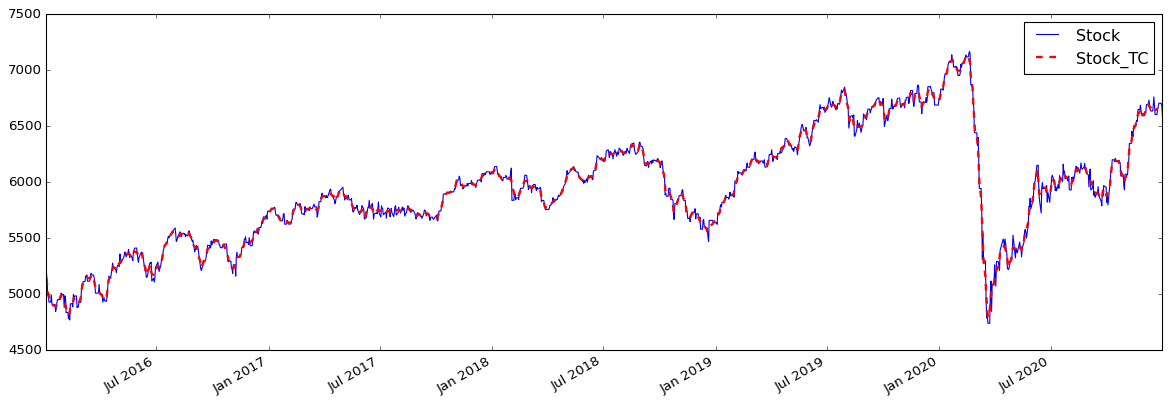

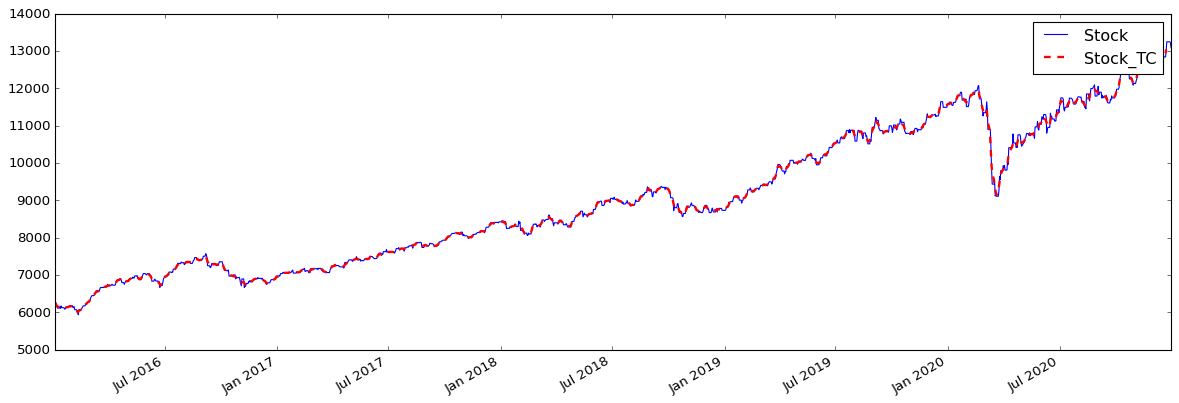

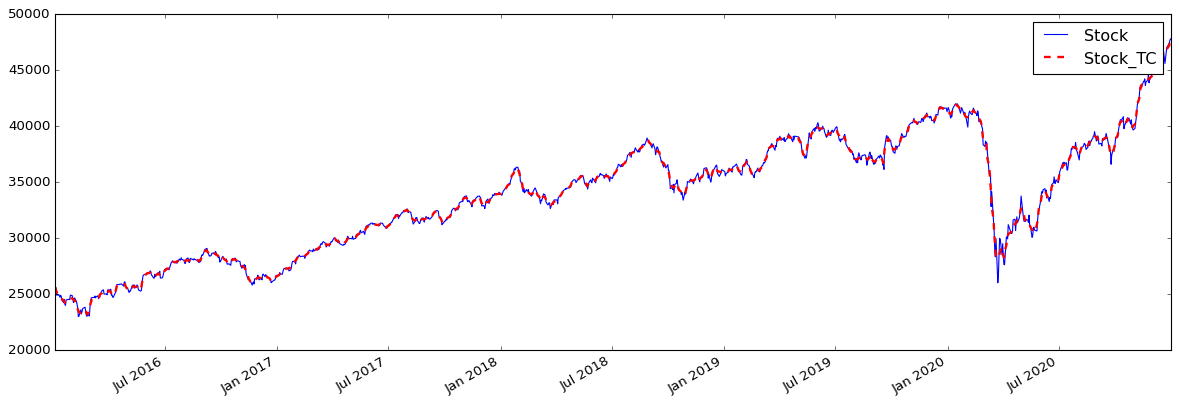

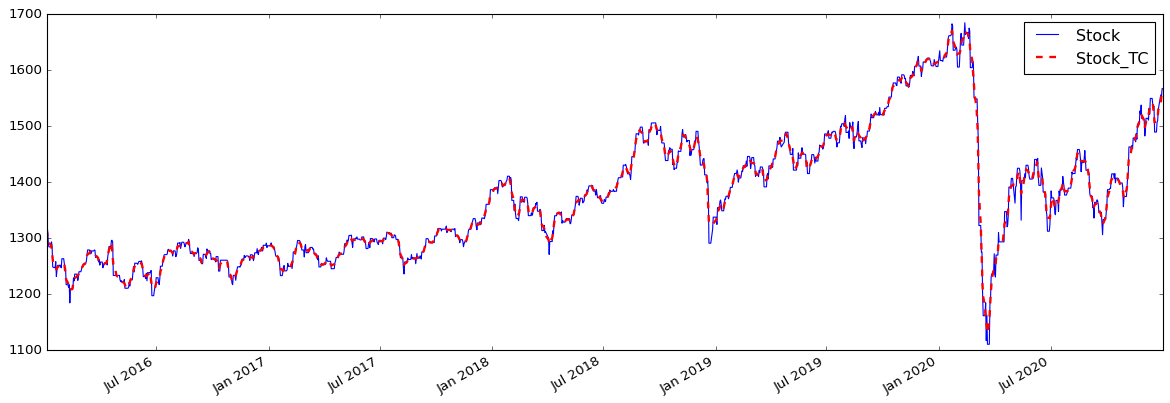

In [ ]:
for counter in range(26):
  ts2 =all_regions_concated.iloc[:, counter]
  ts1 =all_regions_TC.iloc[:, counter]


  plt.style.use('classic')
  plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')

  ax = plt.gca()
  plt.legend (loc='upper left')

  ts2.plot(kind='line', ax=ax, linewidth=1.0, label='Stock')
  ts1.plot(kind='line',linestyle='dashed', color='red',ax=ax, linewidth=2.1, label='Stock_TC')
  plt.legend (loc='lower right');
  #line, = ax.plot([1, 2, 3])
  #line.set_label('Label via method')
  ax.legend()

In [ ]:
all_regions_TC_return = all_regions_TC.pct_change(1).dropna().add_prefix("Return_")

In [ ]:
all_regions_TC_return_lag = all_regions_TC_return.shift(1).dropna().add_prefix("lag_")

In [ ]:
final_df = pd.concat([all_regions_TC_return.iloc[1:],all_regions_TC_return_lag],axis=1)

In [ ]:
from scipy.spatial.distance import pdist, squareform

def vil_dis(X, Y):
    E_X=np.mean(X)
    E_Y=np.mean(Y)
    n = len(X)
    sumation = 0
    
    for i,j in zip( X, Y ): 
        up = abs((i - E_X) - (j - E_Y))
        down = abs(i - E_X) + abs(j - E_Y)
        sumation = sumation + (up/down)
       
    return abs((sumation)/n)

In [ ]:
final_distance_array = pdist(final_df.transpose(), vil_dis)
#dis_novak_final_df_tr.shape
final_distance_matrix = squareform(final_distance_array)

final_smilarity_matrix = 1- final_distance_matrix
print(final_smilarity_matrix)

[[1.         0.69904511 0.64522754 ... 0.33181288 0.3386462  0.37017209]
 [0.69904511 1.         0.73628046 ... 0.32881032 0.35029821 0.3841321 ]
 [0.64522754 0.73628046 1.         ... 0.33857547 0.36536979 0.39924527]
 ...
 [0.33181288 0.32881032 0.33857547 ... 1.         0.33915442 0.37164481]
 [0.3386462  0.35029821 0.36536979 ... 0.33915442 1.         0.3775258 ]
 [0.37017209 0.3841321  0.39924527 ... 0.37164481 0.3775258  1.        ]]


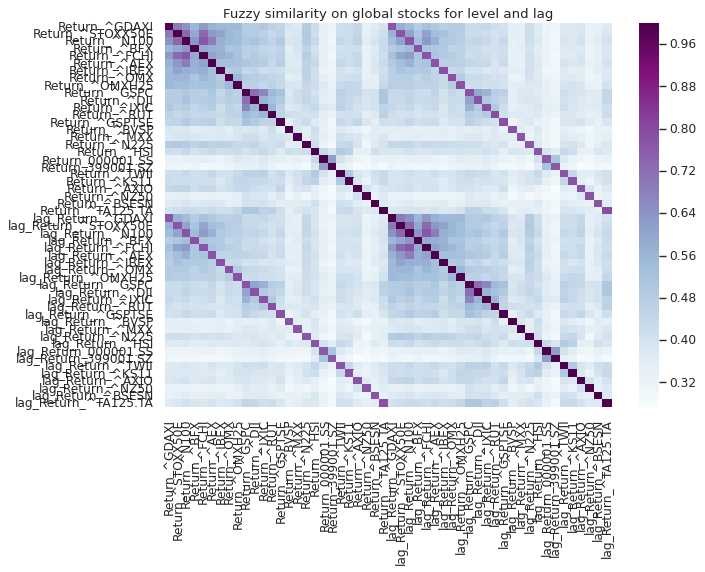

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt

sns.set(rc={'figure.facecolor':'white'})


fig, ax = plt.subplots(figsize=(9,6))

# ax = sns.heatmap(final_smilarity_matrix, cmap='OrRd', annot=False, linewidth=0)
ax = sns.heatmap(final_smilarity_matrix, cmap='BuPu',xticklabels=final_df.columns, yticklabels=final_df.columns, annot=False, linewidth=0)
#ax = sns.heatmap(final_smilarity_matrix, cmap='BuPu', annot=False, linewidth=0)

ax.set_title('Fuzzy similarity on global stocks for level and lag', fontsize=12)

plt.show()

In [ ]:
from rpy2 import robjects
import rpy2.robjects.packages as rpackages

In [ ]:
x = robjects.r('''
library(lfl)
library(readr)
data <- read_csv("PATH TO YOUR MULTIPLE TIME SERIES.csv")
colnames(data) <- c('antecedent1', 'antecedent2', 'consequent') 
fuzzified_data <- lcut(data, 
           context=list(antecedent1=ctx3bilat(),
                        antecedent2=ctx3bilat(),
                        consequent=ctx3bilat()),
           hedges=c('-', 'ex', 've', 'ro'))
rules <- searchrules(fuzzified_data,
                     lhs=1:44,
                     rhs=45:66,
                     n=10)
return(rules)
''')

R[write to console]: Error in library(lfl) : there is no package called ‘lfl’
Calls: <Anonymous> -> <Anonymous> -> library

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



RRuntimeError: ignored

In [ ]:
df = pd.DataFrame(x)

In [ ]:
df1 = df.rename({0:"support",1:"lhsSupport",2:"rhsSupport",3:"confidence",})